# 05_04: Math and plotting with Pandas

In [3]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

We have seen how to load and create DataFrames and how to select rows, but we have not done much with the values in the table! Many data-analysis tasks require that we perform computations on the data and visualize them. Let's try that with Pandas.

We'll load a dataset consisting of global population, health, and wealth statistics from the amazing `gapminder` website. [Browse https://www.gapminder.org/tools] Gapminder is a Swedish foundation created by the late Hans Rosling to promote a fact-based worldview, and to fight misconceptions about global development.

So we load the comma separated file:

In [14]:
gapminder = pd.read_csv('gapminder2.csv', dtype_backend='pyarrow', engine='pyarrow')

[Consider removing data before 1900 for plots]

In [15]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41822 entries, 0 to 41821
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   country           41822 non-null  string[pyarrow]
 1   year              41822 non-null  int64[pyarrow] 
 2   region            41822 non-null  string[pyarrow]
 3   population        41822 non-null  double[pyarrow]
 4   life_expectancy   40629 non-null  double[pyarrow]
 5   age5_surviving    40490 non-null  double[pyarrow]
 6   babies_per_woman  41822 non-null  double[pyarrow]
 7   gdp_per_capita    41822 non-null  double[pyarrow]
dtypes: double[pyarrow](5), int64[pyarrow](1), string[pyarrow](2)
memory usage: 2.8 MB


And we see that the dataset includes a number of global statistics: for a country and year, we get population, life expectancy, the percentage of children born alive who survive to age 5, the average number of babies per fertile woman, and the yearly domestic product per person in 2011 (2017) dollars. We also get the geographical region. 

[Life expectancy is the average age of death of all those born alive.]

We can ask pandas to compute simple statistics on all the fields. We see that there almost 42000 records in the dataset for years ranging from 1800 to 2023. This summary gives us the minimum, maximum, mean, and standard deviation for all fields, as well as the 25/50/75th percentiles, which represent the typical range of variation for a quantity.

In [16]:
gapminder.describe()

,year,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
count,41822.0,41822.0,40629.0,40490.0,41822.0,41822.0
mean,1915.563818,14143381.738798,45.147504,72.596526,5.242053,6124.325212
std,62.938582,68712303.152696,16.831495,16.604898,1.728142,12328.127667
min,1800.0,1830.0,0.0,24.4,0.71,386.0
25%,1862.0,331000.0,32.0,58.4,4.22,1220.0
50%,1916.0,1920000.0,37.3,66.7,5.81,2100.0
75%,1970.0,6617500.0,60.1,89.6,6.55,4970.0
max,2023.0,1440000000.0,85.4,99.857,8.86,218000.0


One of the points that gapminder makes to great effect is that life_expectancy improves with wealth (national product per person), and that the correlation is even clearer if we look at the _logarithm_ of the gdp per person, per day. We don't have a column with that information, but it's very easy to compute it.

I divide the gdp_per_capita by the average number of days in a year, and I use a numpy universal function (which works fine with pd) to get the logarithm. By assigning values to a new column name, a new column is created in the DataFrame.

In [17]:
gapminder['log_gdp_per_day'] = np.log10(gapminder['gdp_per_capita'] / 365.25)

In [18]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.2,53.1,7.0,599.0,0.214837
1,Afghanistan,1806,Asia,3280000.0,28.1,53.0,7.0,599.0,0.214837
2,Afghanistan,1816,Asia,3280000.0,28.1,52.9,7.0,599.0,0.214837
3,Afghanistan,1817,Asia,3280000.0,28.0,52.9,7.0,599.0,0.214837
4,Afghanistan,1820,Asia,3290000.0,28.0,52.9,7.0,599.0,0.214837


To see global trends as a function of time, or to examine individual countries, it makes sense to index by year and country!

In [19]:
gapminder_by_year = gapminder.set_index('year').sort_index()

In [20]:
gapminder_by_country = gapminder.set_index('country').sort_index()

Pandas has its own plotting interface, which was designed to display multiple variables together. We want to show life expectancy as a function of logarithmic gross domestic product. So we select data for 1960 with loc, and then generate a scatter plot of those two variables.

The situation in 1960 is pretty clear, with a clear correlation between the two variables across all countries.

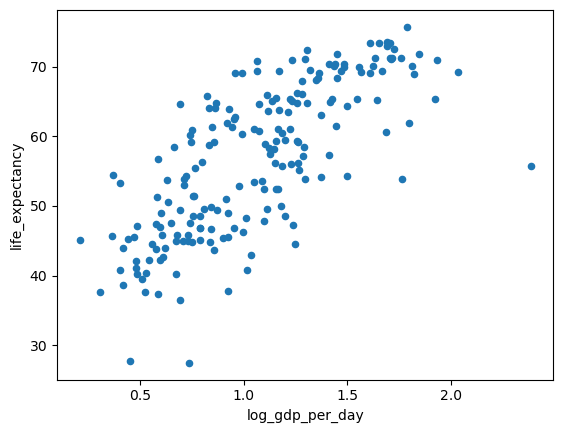

In [21]:
gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day', 'life_expectancy');

To compare with a more recent year in the same plot, we need to grab a matplotlib "axes" object from the first plot, and pass it to second. We should also change colors, and label the two clouds of points.

In 2015 everyone is richer and can look forward to a longer life; if anything, we observe a flattening of life expectancy for the richer countries. 

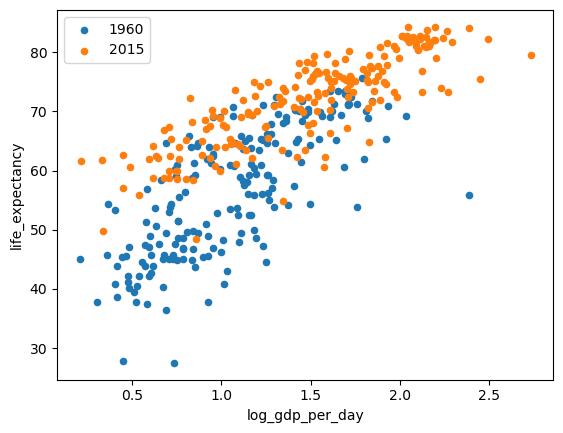

In [22]:
axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day', 'life_expectancy', label=1960)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day', 'life_expectancy', label=2015, color='C1', ax=axes);

The trend is the same for other statistical indicators, such as survival to age 5.

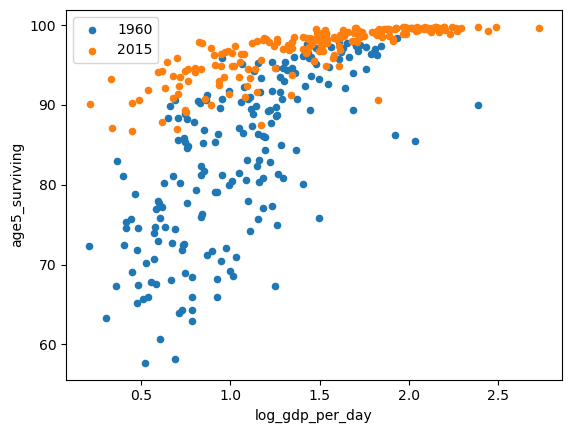

In [23]:
axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day', 'age5_surviving', label=1960)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day', 'age5_surviving', label=2015, color='C1', ax=axes);

The DF indexed by country lets us make easy plots of the chronological evolution of an indicator, such as life_expectancy for Italy. The result may be jumbled if we don't first sort the values by year!

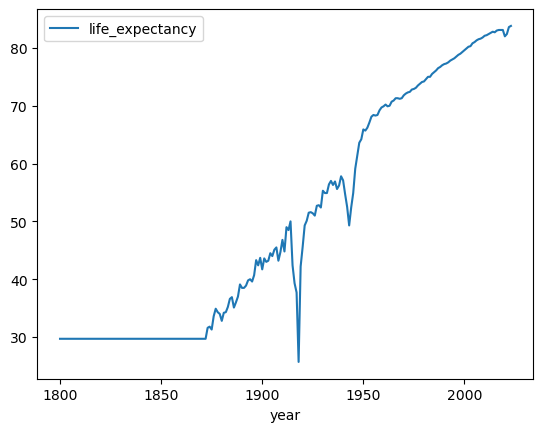

In [24]:
gapminder_by_country.loc['Italy'].sort_index(). plot('year', 'life_expectancy');

This style of programming where I concatenate one pandas method after the other is in fact quite idiomatic for pandas (if not for Python). One may say that Pandas speaks its own Python dialect!

Here's a comparative plot for three countries. Italy caught up with the United States in 1960, and China is now coming close, despite the disastrous 1960 famine.

Text(0, 0.5, 'life expectancy')

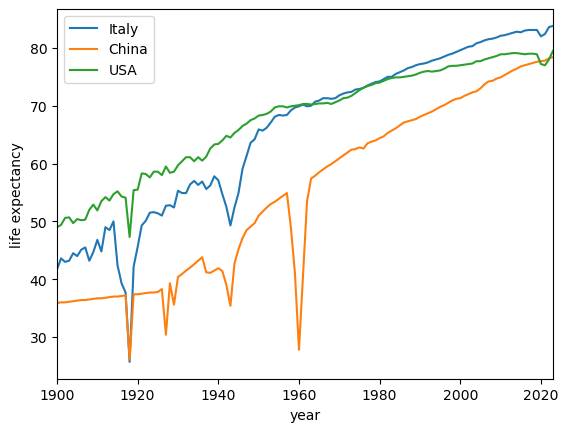

In [30]:
axes = gapminder_by_country.loc['Italy'].sort_values('year').plot('year', 'life_expectancy', label='Italy')
gapminder_by_country.loc['China'].sort_values('year').plot('year', 'life_expectancy', label='China', ax=axes)
gapminder_by_country.loc['USA'].sort_values('year').plot('year', 'life_expectancy', label='USA', ax=axes)

pp.axis(xmin=1900, xmax=2023)
pp.ylabel('life expectancy')

Another interesting and important correlation is between fertility rate and survival to age 5. To look at the question globally, we can compute the average fertility rate over all records, but it does not mean much since it mixes data from many years.

In [31]:
gapminder.babies_per_woman.mean()

5.242053225575057

We can use the pandas `groupby` functionality to segment the df by year before computing the average. The result is a Series indexed by year. which shows the average fertility rate as a function of time.

In [32]:
gapminder.groupby('year').babies_per_woman.mean()

year
1800    6.041333
1801    5.963391
1802     5.96687
1803    5.908136
1804    6.027302
          ...   
2019    2.620205
2020    2.573538
2021    2.539897
2022    2.492359
2023    2.458308
Name: babies_per_woman, Length: 224, dtype: double[pyarrow]

I will plot it against the age 5 survival, treated in the same fashion. The plot method allows us to add a second axis on the right to show the range of the second variable.

The plot shows forcefully that high natality is a consequence of infant mortality, and that women have many fewer children when they believe they will survive. On a smaller scale, we see the post-1950 baby boom.

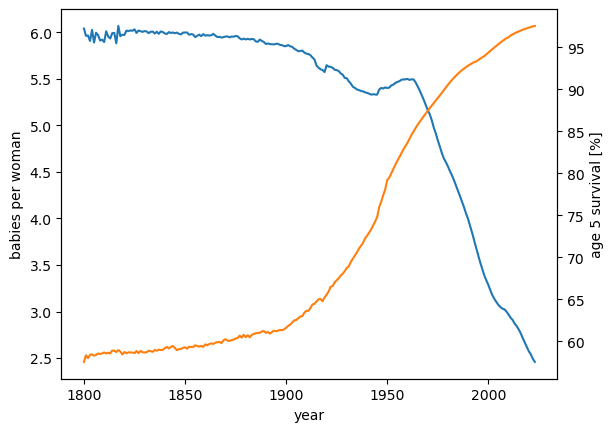

In [33]:
gapminder.groupby('year').babies_per_woman.mean().plot()
pp.ylabel('babies per woman')

gapminder.groupby('year').age5_surviving.mean().plot(secondary_y=True)
pp.ylabel('age 5 survival [%]');

To gain even more insight, we can create a _pivot table_ that segments the fertility means by both year and geographical region.

In [34]:
gapminder.pivot_table('babies_per_woman', 'year', 'region')

region,Africa,America,Asia,Europe,Oceania
year,,,,,
1800,6.397593,6.041714,6.3466,5.148571,6.254286
1801,6.311923,6.052593,6.438889,5.032143,6.215714
1802,6.369286,6.035926,6.466471,4.977647,6.40625
1803,6.339286,6.034643,6.282917,5.046129,6.21
1804,6.410938,6.025769,6.486333,5.111667,6.21
...,...,...,...,...,...
2019,4.118889,1.926857,2.2914,1.535,3.002857
2020,4.047778,1.879143,2.2468,1.517619,2.957857
2021,3.978333,1.846857,2.2094,1.530952,2.931429


pandas offers a quick way to plot pivot tables! The drop in fertility came after the baby boom for Africa, America, and Asia. Europe was already low, and decreasing since the beginning of the century.

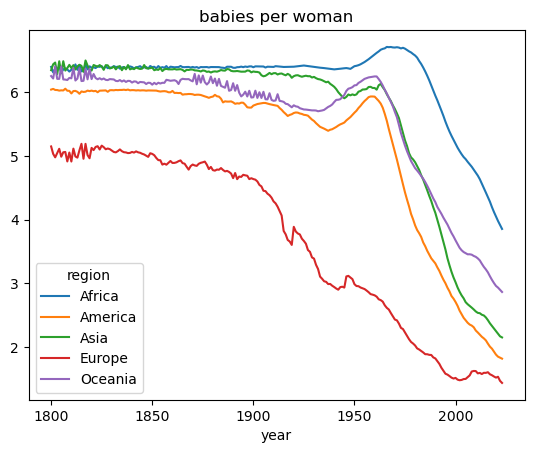

In [85]:
gapminder.pivot_table('babies_per_woman', 'year', 'region').plot()
pp.title('babies per woman');

And here's the corresponding plot for age 5 survival. Africa is now roughly where Europe was in 1950.

<Axes: xlabel='year'>

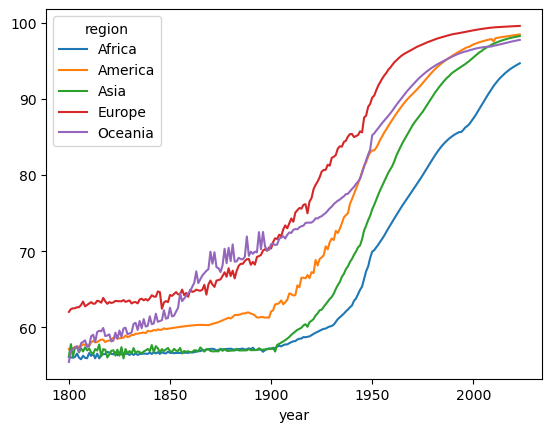

In [36]:
gapminder.pivot_table('age5_surviving', 'year', 'region').plot()

Using Pandas' built-in plotting functions is surely the quickest way to make insightful statistical illustrations, but for maximum flexibility you can always use the standard matplotlib functions, which are fully customizable, on pandas Series. In fact, `matplotlib` will recognize column names, and it will try to use the index as the x coordinate.

There is a lot more that you can do in Pandas, and there's a lot more to learn that I can cover in this course. I tried instead to give you a feel for what is possible and practical.

I encourage you to start working on a dataset that interests you, and to pick up more techniques and knowledge using the many resources available on the web.